In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
from google.colab import files
from io import BytesIO

class KMeans:
    def __init__(self, k, max_iters=100, tol=1e-4):
        self.k = k
        self.max_iters = max_iters
        self.tol = tol

    def fit(self, X):
        self.centroids = X[np.random.choice(len(X), self.k, replace=False)]
        for _ in range(self.max_iters):
            distances = np.linalg.norm(X[:, None] - self.centroids, axis=2)
            self.labels = np.argmin(distances, axis=1)
            new_centroids = np.array([
                X[self.labels == j].mean(axis=0) if len(X[self.labels == j]) > 0 else self.centroids[j]
                for j in range(self.k)
            ])
            if np.linalg.norm(self.centroids - new_centroids) < self.tol:
                break
            self.centroids = new_centroids

    def predict(self, X):
        distances = np.linalg.norm(X[:, None] - self.centroids, axis=2)
        return np.argmin(distances, axis=1)

In [2]:

def load_image_colab():
    uploaded = files.upload()
    for filename in uploaded:
        image = Image.open(BytesIO(uploaded[filename]))
        return np.array(image)

In [3]:
def segment_image(image, k):
    h, w, c = image.shape
    X = image.reshape((-1, 3)).astype(np.float32)

    kmeans = KMeans(k=k)
    kmeans.fit(X)
    labels = kmeans.predict(X)

    return labels.reshape(h, w), kmeans.centroids, h, w

In [4]:
def visualize_clusters(image, labels, centroids):
    k = len(centroids)

    # Create the main figure with 2 rows (images + color palette)
    plt.figure(figsize=(15, 8))

    # First row with original and clustered images
    plt.subplot(2, 1, 1)
    plt.subplots_adjust(hspace=0.3)

    # Original image
    plt.subplot(2, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')

    # Clustered image
    plt.subplot(2, 2, 2)
    clustered_image = centroids[labels].astype(np.uint8)
    plt.imshow(clustered_image)
    plt.title(f"Clustered Image (K={k})")
    plt.axis('off')

    # Second row with color palette spanning full width
    plt.subplot(2, 1, 2)

    # Create color swatches with each color taking equal space
    swatch_height = 100
    swatch_width = 50  # width per color
    total_width = swatch_width * k

    color_swatches = np.zeros((swatch_height, total_width, 3), dtype=np.uint8)
    for i, color in enumerate(centroids):
        start_col = i * swatch_width
        end_col = (i + 1) * swatch_width
        color_swatches[:, start_col:end_col] = color.astype(np.uint8)

    plt.imshow(color_swatches)

    # Add color index labels
    for i in range(k):
        x_pos = i * swatch_width + swatch_width / 2
        plt.text(x_pos, swatch_height + 20, str(i),
                ha='center', va='center', fontsize=10)

    plt.title("Cluster Color Palette")
    plt.axis('off')
    plt.tight_layout()

    plt.show()

In [5]:
def isolate_number(image, labels, centroids, h, w):
    # First visualize all clusters
    visualize_clusters(image, labels, centroids)

    # Print cluster information
    print("Cluster sizes:")
    unique, counts = np.unique(labels, return_counts=True)
    for cluster, size in zip(unique, counts):
        print(f"Cluster {cluster}: {size} pixels (RGB: {centroids[cluster].astype(int)})")

    # Get user input for which clusters contain the number
    number_clusters = list(map(int, input("Enter which cluster(s) contain the number (comma separated): ").split(',')))

    # Create output image (red number on black background)
    output = np.zeros((h, w, 3), dtype=np.uint8)
    for i in range(h):
        for j in range(w):
            if labels[i, j] in number_clusters:
                output[i, j] = [255, 0, 0]  # Red
            else:
                output[i, j] = [0, 0, 0]    # Black

    return output

Saving 42.jpg to 42 (1).jpg


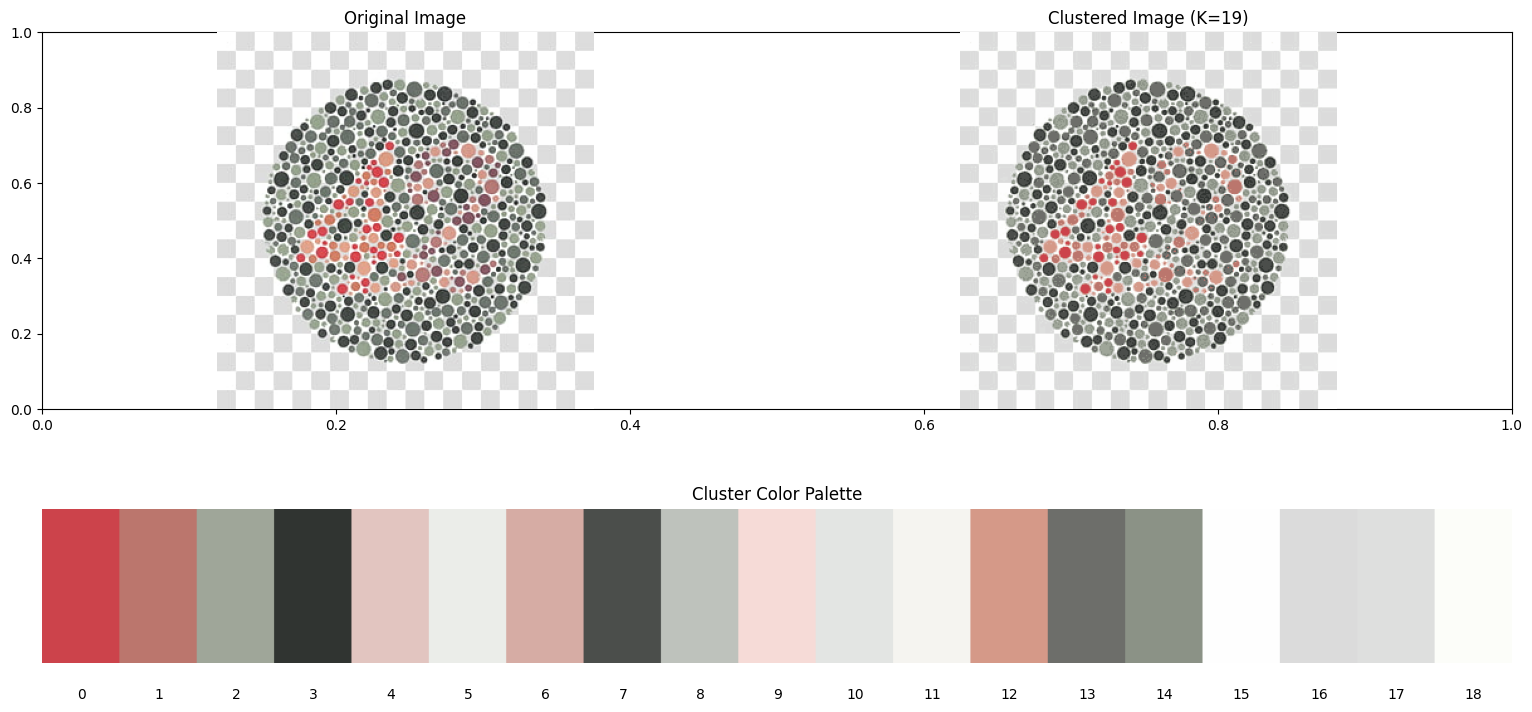

Cluster sizes:
Cluster 0: 755 pixels (RGB: [204  67  75])
Cluster 1: 1129 pixels (RGB: [187 118 109])
Cluster 2: 4010 pixels (RGB: [159 166 153])
Cluster 3: 3100 pixels (RGB: [48 52 49])
Cluster 4: 604 pixels (RGB: [226 197 192])
Cluster 5: 1657 pixels (RGB: [235 237 233])
Cluster 6: 543 pixels (RGB: [214 172 164])
Cluster 7: 4371 pixels (RGB: [75 78 75])
Cluster 8: 2943 pixels (RGB: [190 194 188])
Cluster 9: 504 pixels (RGB: [246 219 215])
Cluster 10: 1971 pixels (RGB: [227 229 227])
Cluster 11: 1432 pixels (RGB: [245 244 240])
Cluster 12: 1356 pixels (RGB: [213 153 136])
Cluster 13: 5613 pixels (RGB: [109 110 106])
Cluster 14: 3938 pixels (RGB: [139 146 134])
Cluster 15: 26432 pixels (RGB: [254 254 254])
Cluster 16: 19534 pixels (RGB: [219 219 219])
Cluster 17: 7341 pixels (RGB: [222 223 222])
Cluster 18: 2767 pixels (RGB: [252 253 249])
Enter which cluster(s) contain the number (comma separated): 0,1,4,6,9,12


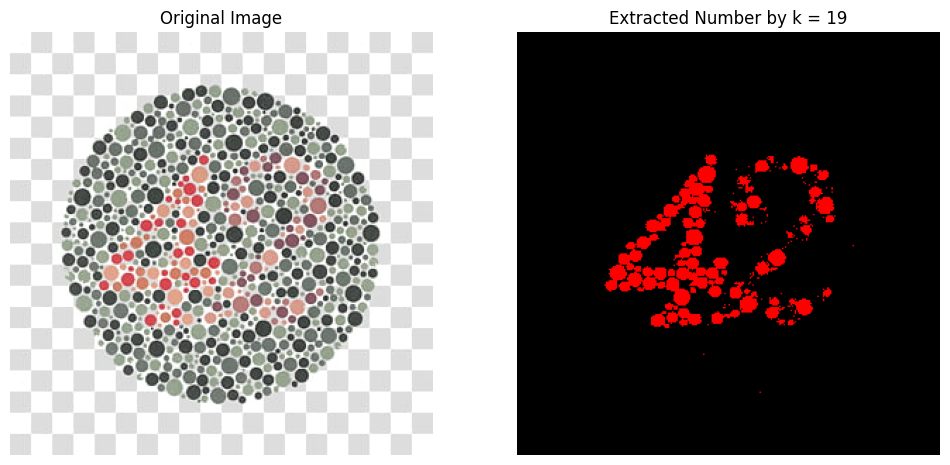

In [8]:
def extract_red_number_image(k=19):
    image = load_image_colab()
    labels, centroids, h, w = segment_image(image, k)
    output = isolate_number(image, labels, centroids, h, w)


    plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.imshow(image)
    plt.title("Original Image")
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(output)
    plt.title(f"Extracted Number by k = {k}")
    plt.axis('off')
    plt.show()


extract_red_number_image()